### <font color="red"> Machine Learning com Scikit-Learn </font>

Problema de Negócio:

Usando dados históricos é possível prever o salário de alguém com base no tempo dedicado aos estudos em horas por mês?

In [1]:
# Imports

# Manipulação de dados
import numpy as np
import pandas as pd

# Visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns

# Aprendizado de máquina
from sklearn.linear_model import LinearRegression # Algoritmo de Regressão Linear
from sklearn.model_selection import train_test_split # Treinar e testar o modelo

In [2]:
# Carrega o dataset
df = pd.read_csv('dataset.csv')

In [3]:
df.shape

(500, 2)

In [4]:
df.columns

Index(['horas_estudo_mes', 'salario'], dtype='object')

In [5]:
df.head()

,horas_estudo_mes,salario
0,57.0,6813.0
1,48.0,6855.0
2,60.0,5801.0
3,73.0,7431.0
4,46.0,5475.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   horas_estudo_mes  500 non-null    float64
 1   salario           500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


In [7]:
# Verifica se há valores ausentes
df.isnull().sum()

horas_estudo_mes    0
salario             0
dtype: int64

In [8]:
# Correlação
df.corr()

,horas_estudo_mes,salario
horas_estudo_mes,1.000000,0.818576
salario,0.818576,1.000000


Há uma forte correlação entre as variáveis.

In [9]:
# Resumo estatístico do dataset
df.describe()

,horas_estudo_mes,salario
count,500.000000,500.000000
mean,50.060000,6018.930000
std,14.659406,848.697853
min,1.000000,3664.000000
25%,39.750000,5473.000000
50%,50.000000,6013.500000
75%,60.000000,6542.000000
max,100.000000,9348.000000


In [10]:
# Resumo estatístico da variável preditora (variável de entrada)
df["horas_estudo_mes"].describe()

count    500.000000
mean      50.060000
std       14.659406
min        1.000000
25%       39.750000
50%       50.000000
75%       60.000000
max      100.000000
Name: horas_estudo_mes, dtype: float64

<Axes: xlabel='horas_estudo_mes', ylabel='Count'>

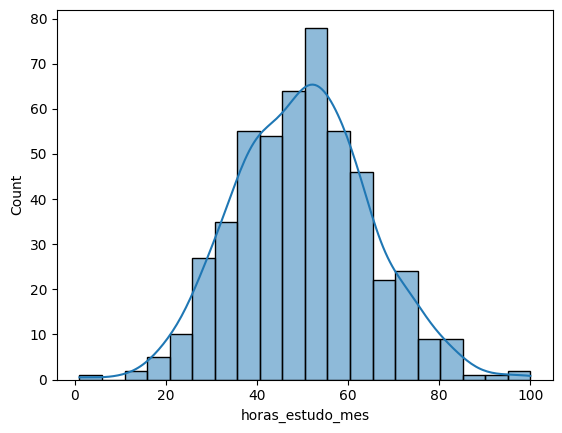

In [11]:
# Histograma da variável preditora
sns.histplot(data = df, x = "horas_estudo_mes", kde = True)

#### Preparação dos Dados 📉

In [12]:
# Prepara a variável de entrada X
x = np.array(df['horas_estudo_mes'])

In [13]:
type(x)

numpy.ndarray

In [14]:
# Ajusta o shape de X
x = x.reshape(-1, 1)

In [15]:
# Prepara a variável alvo
y = df['salario']

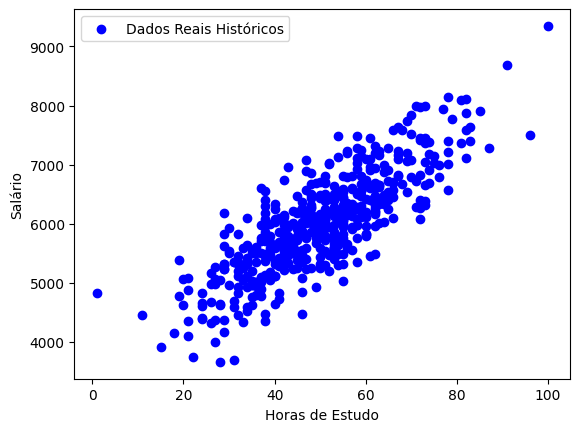

In [16]:
# Gráfico de dispersão entre X e Y
plt.scatter(x, y, color = "blue", label = "Dados Reais Históricos")
plt.xlabel("Horas de Estudo")
plt.ylabel("Salário")
plt.legend()
plt.show()

À medida que aumenta as horas de estudo, o salário também aumenta.

In [17]:
# Dividir dados em treinamento e teste
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.2, random_state = 42)

80% dos dados serão usados para treinamento, 20% para teste, e a divisão será sempre a mesma se random_state for mantido como 42

In [18]:
x_treino.shape

(400, 1)

In [19]:
x_teste.shape

(100, 1)

In [20]:
y_treino.shape

(400,)

In [21]:
y_teste.shape

(100,)

#### Modelagem Preditiva (Machine Learning) 💡

In [22]:
# Cria o modelo de regressão linear simples
modelo = LinearRegression()

In [23]:
# Treina o modelo
modelo.fit(x_treino, y_treino)


LinearRegression()

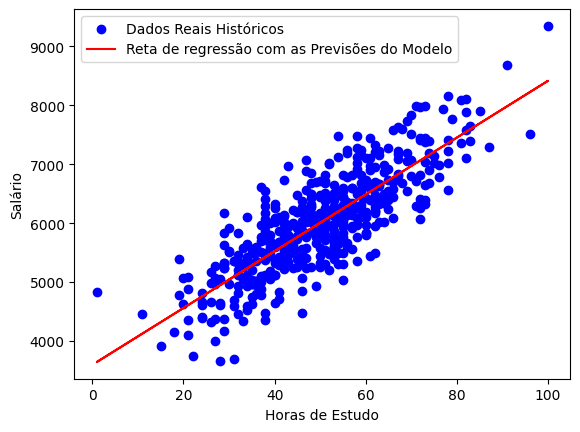

In [24]:
# Visualiza a reta de regressão linear (previsões) e os dados reais usados no treinamento
plt.scatter(x, y, color = "blue", label = "Dados Reais Históricos")
plt.plot(x, modelo.predict(x), color = "red", label = "Reta de regressão com as Previsões do Modelo")
plt.xlabel("Horas de Estudo")
plt.ylabel("Salário")
plt.legend()
plt.show()

In [25]:
# Avalia o modelo nos dados de teste
score = modelo.score(x_teste, y_teste)
print(f"Coeficiente R^2: {score:.2f}")

Coeficiente R^2: 0.59


R² próximo de 1: Isso sugere que uma alta proporção da variabilidade da variável dependente está sendo explicada pelos regressores no modelo. Em termos simples, o modelo está se ajustando bem aos dados.

R² próximo de -1: Isso também indica um bom ajuste, mas com a diferença de que as relações entre variáveis são inversamente proporcionais. Neste caso, o modelo está explicando bem a variabilidade, mas as mudanças nas variáveis independentes estão associadas a mudanças inversas na variável dependente.

R² próximo de 0: Isso sugere que o modelo não está explicando bem a variabilidade dos dados. Pode indicar que as variáveis independentes não estão contribuindo de forma significativa para explicar a variabilidade na variável dependente.

Então, resumindo, quanto mais próximo de 1, melhor, quanto mais próximo de 0, menos útil é o modelo, e quanto mais próximo de -1, também é bom, mas com uma relação inversa entre variáveis.

In [26]:
# Intercepto - parâmetro w0
modelo.intercept_

3596.7837243727545

In [27]:
# Slope - parâmetro w1
modelo.coef_

array([48.18185277])

O intercepto e a inclinação (ou slope) são parâmetros que descrevem a relação linear entre variáveis independentes e dependentes.

#### Deploy do Modelo ✅

In [28]:
# Define um novo valor para horas de estudo
horas_estudo_novo = np.array([[48]])

# Faz previsão com o modelo treinado
salario_previsto = modelo.predict(horas_estudo_novo)

print(f"Se você estudar cerca de", horas_estudo_novo, "horas por mês, seu salário pode ser igual a", salario_previsto)

Se você estudar cerca de [[48]] horas por mês, seu salário pode ser igual a [5909.5126574]


In [29]:
# Mesmo resultado anterior usando os parâmetros (coeficientes) aprendidos pelo modelo
# y_novo = w0 + w1 * X
salario = modelo.intercept_ + (modelo.coef_ * horas_estudo_novo)
print(salario)

[[5909.5126574]]


In [30]:
# Define um novo valor para horas de estudo
horas_estudo_novo = np.array([[65]])

# Faz previsão com o modelo treinado
salario_previsto = modelo.predict(horas_estudo_novo)

print(f"Se você estudar cerca de", horas_estudo_novo, "horas por mês, seu salário pode ser igual a", salario_previsto)

Se você estudar cerca de [[65]] horas por mês, seu salário pode ser igual a [6728.60415452]


In [31]:
# Define um novo valor para horas de estudo
horas_estudo_novo = np.array([[75]])

# Faz previsão com o modelo treinado
salario_previsto = modelo.predict(horas_estudo_novo)

print(f"Se você estudar cerca de", horas_estudo_novo, "horas por mês, seu salário pode ser igual a", salario_previsto)

Se você estudar cerca de [[75]] horas por mês, seu salário pode ser igual a [7210.42268223]
